开始训练...
Epoch [10/100], Loss: 1.0655


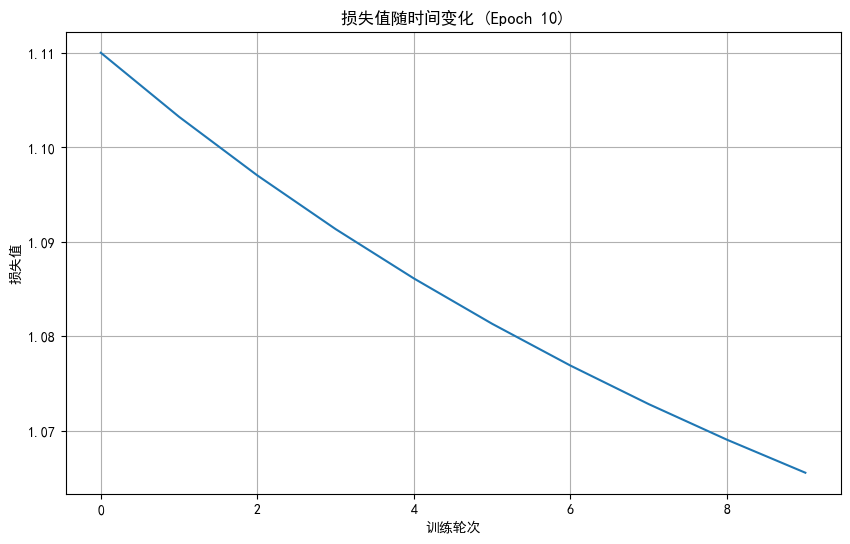

Epoch [20/100], Loss: 1.0412


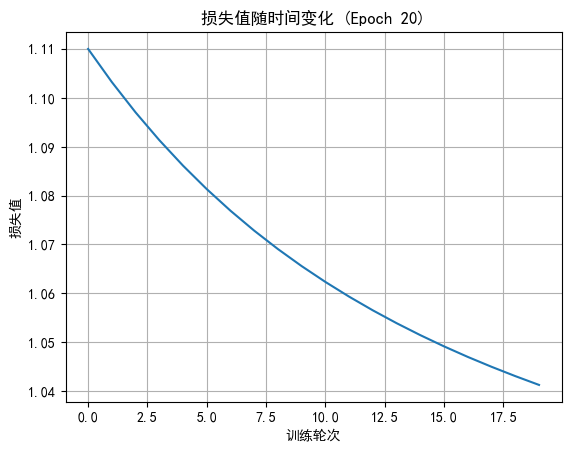

Epoch [30/100], Loss: 1.0271


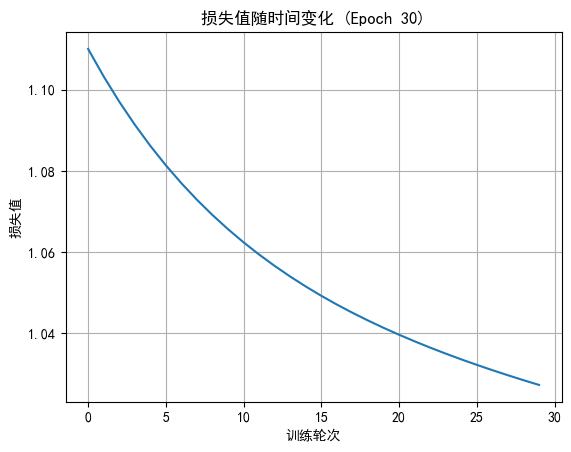

Epoch [40/100], Loss: 1.0170


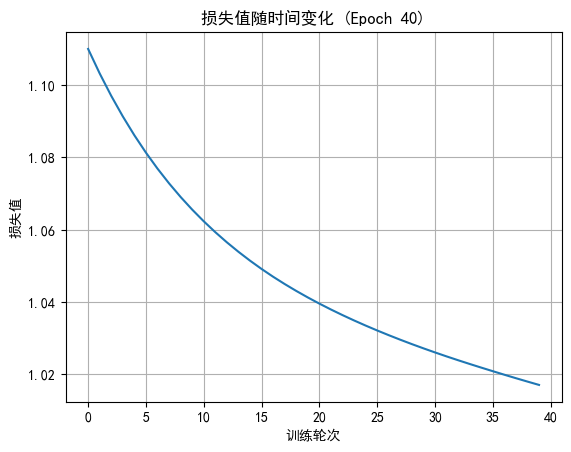

Epoch [50/100], Loss: 1.0084


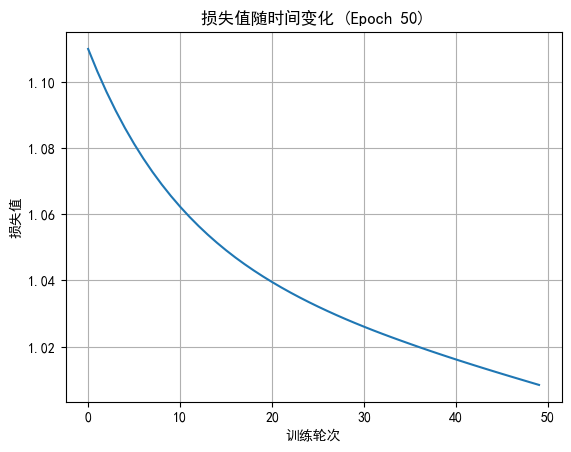

Epoch [60/100], Loss: 1.0005


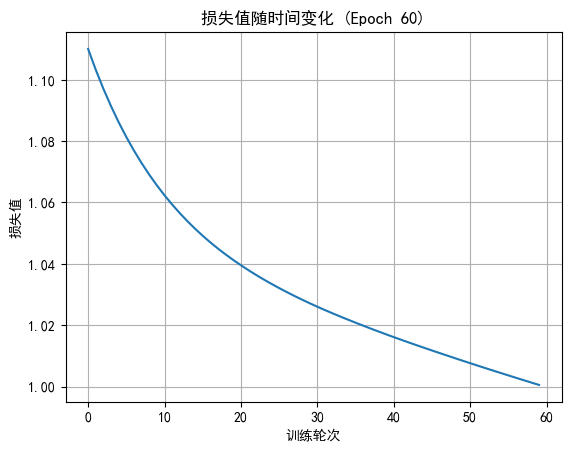

Epoch [70/100], Loss: 0.9932


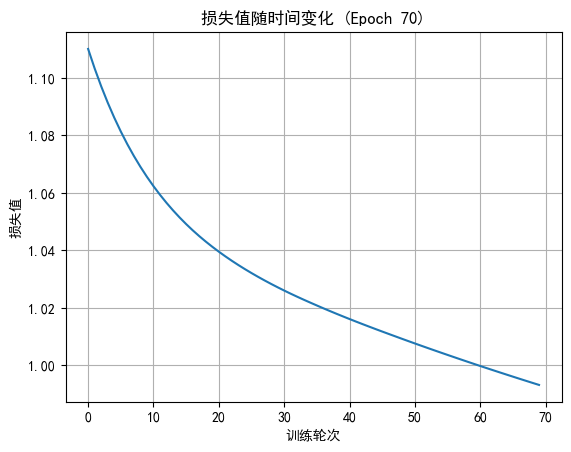

Epoch [80/100], Loss: 0.9862


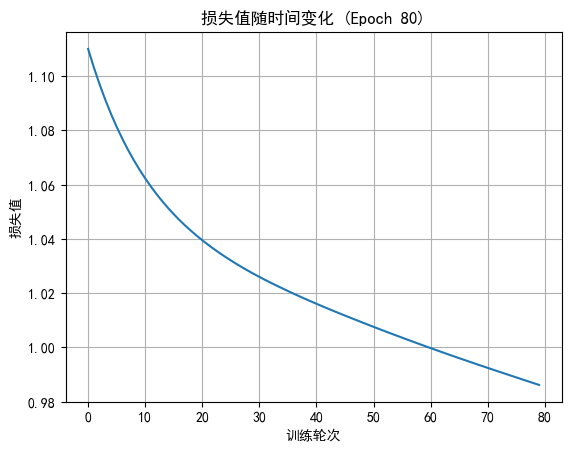

Epoch [90/100], Loss: 0.9794


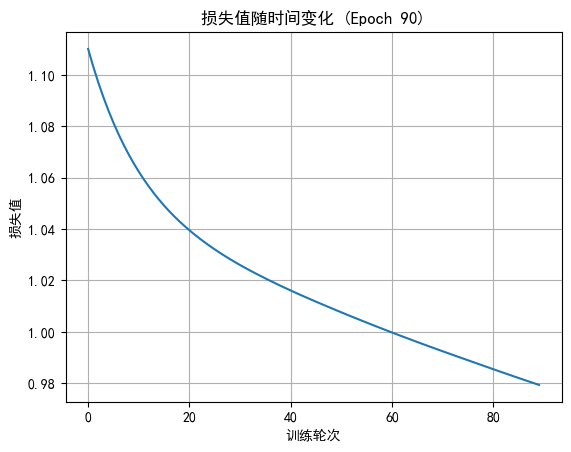

Epoch [100/100], Loss: 0.9728


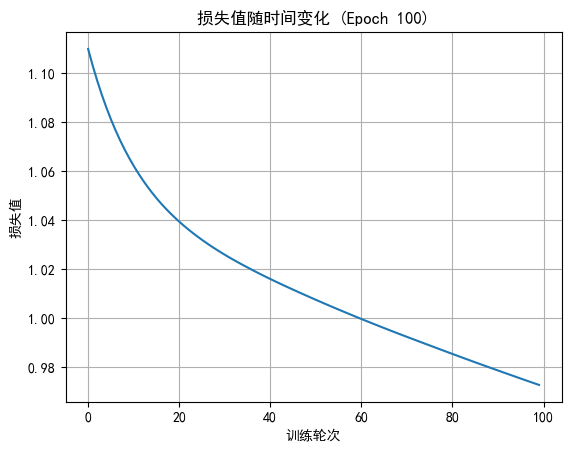

训练完成!


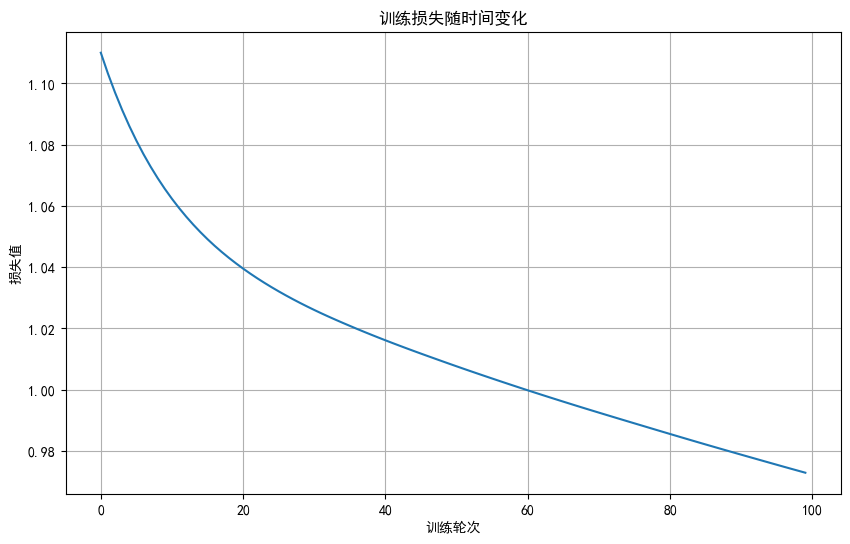

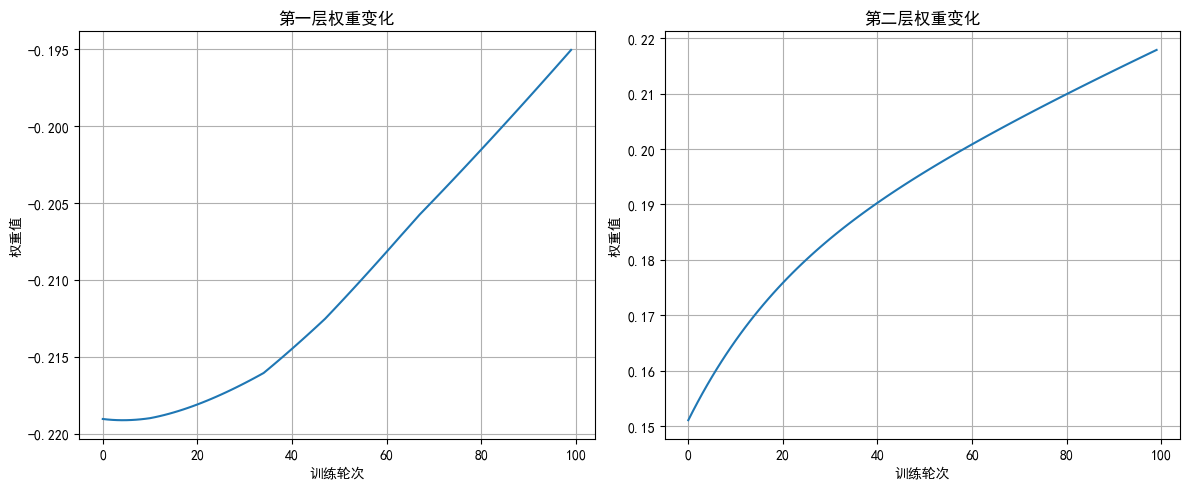

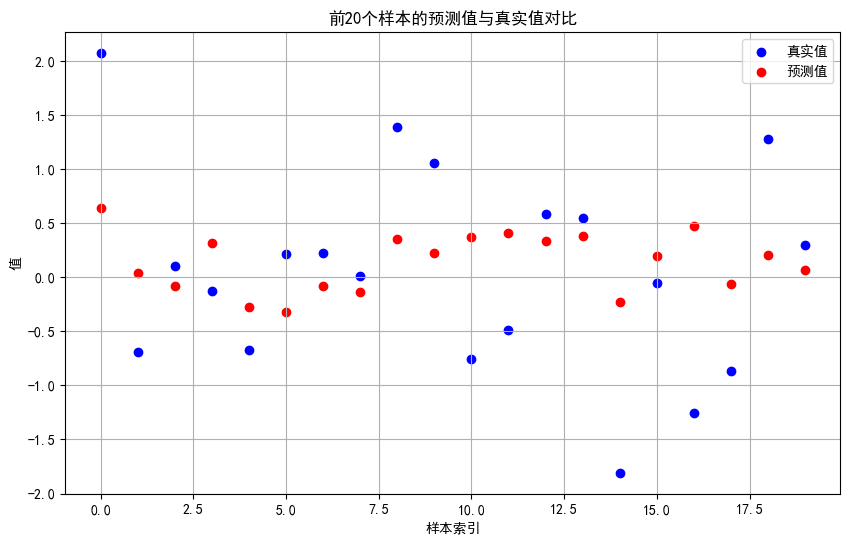

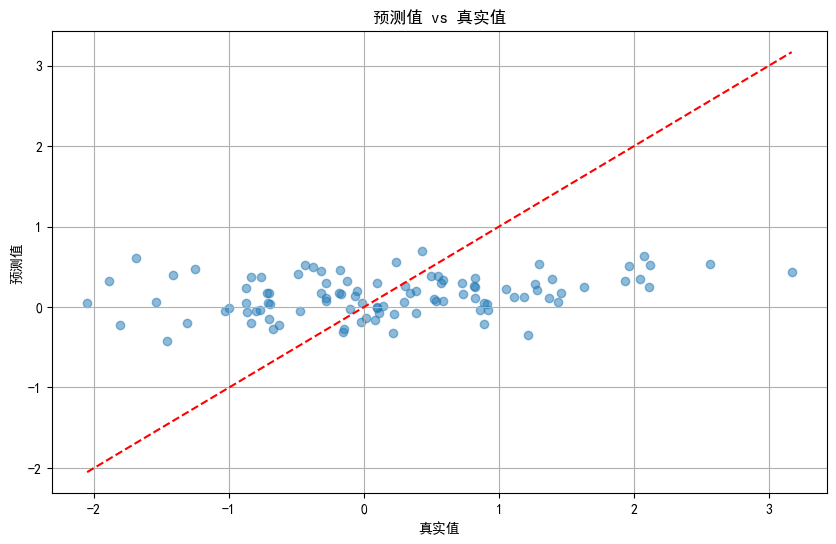

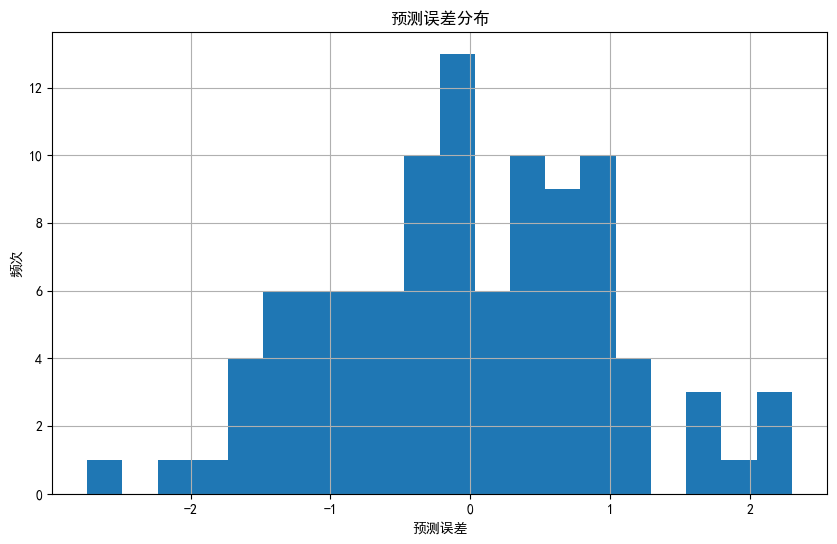

In [6]:
# 首先解决OpenMP冲突问题
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False   # 解决负号显示问题

# 1. 定义一个简单的神经网络模型
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 2. 设置参数并生成随机数据
input_size = 10
hidden_size = 20
output_size = 1
num_samples = 100
learning_rate = 0.01
num_epochs = 100

# 随机生成输入数据和目标标签
X_train = torch.randn(num_samples, input_size).float()
y_train = torch.randn(num_samples, output_size).float()

# 3. 实例化模型、损失函数和优化器
model = SimpleNet(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 4. 创建存储训练过程数据的列表
loss_values = []
fc1_weights = []
fc2_weights = []

# 5. 训练循环并在每个阶段进行可视化
print("开始训练...")

# 创建图形以在训练期间更新
plt.figure(figsize=(10, 6))
plt.ion()  # 开启交互模式

for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 记录训练数据
    loss_values.append(loss.item())
    fc1_weights.append(model.fc1.weight[0, 0].item())
    fc2_weights.append(model.fc2.weight[0, 0].item())

    # 每隔10轮显示一次训练过程
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
        # 清除之前的图
        plt.clf()
        
        # 绘制损失曲线
        plt.plot(loss_values)
        plt.title(f'损失值随时间变化 (Epoch {epoch+1})')
        plt.xlabel('训练轮次')
        plt.ylabel('损失值')
        plt.grid(True)
        
        # 显示图形并暂停
        plt.pause(0.1)

print("训练完成!")
plt.ioff()  # 关闭交互模式

# 6. 完成训练后的详细可视化
# 可视化 - 损失曲线
plt.figure(figsize=(10, 6))
plt.plot(loss_values)
plt.title('训练损失随时间变化')
plt.xlabel('训练轮次')
plt.ylabel('损失值')
plt.grid(True)
plt.show()

# 可视化 - 模型权重变化
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fc1_weights)
plt.title('第一层权重变化')
plt.xlabel('训练轮次')
plt.ylabel('权重值')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(fc2_weights)
plt.title('第二层权重变化')
plt.xlabel('训练轮次')
plt.ylabel('权重值')
plt.grid(True)
plt.tight_layout()
plt.show()

# 可视化 - 前20个样本的预测值与真实值对比
with torch.no_grad():
    predictions = model(X_train[:20])

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_train[:20].numpy(), color='blue', label='真实值')
plt.scatter(range(20), predictions.numpy(), color='red', label='预测值')
plt.legend()
plt.title('前20个样本的预测值与真实值对比')
plt.xlabel('样本索引')
plt.ylabel('值')
plt.grid(True)
plt.show()

# 可视化 - 全部样本的预测散点图
with torch.no_grad():
    predictions = model(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(y_train.numpy(), predictions.numpy(), alpha=0.5)
plt.plot([y_train.min().item(), y_train.max().item()], 
         [y_train.min().item(), y_train.max().item()], 'r--')
plt.title('预测值 vs 真实值')
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.grid(True)
plt.show()

# 可视化 - 预测误差分布
errors = predictions - y_train
plt.figure(figsize=(10, 6))
plt.hist(errors.numpy(), bins=20)
plt.title('预测误差分布')
plt.xlabel('预测误差')
plt.ylabel('频次')
plt.grid(True)
plt.show()